 # Exploratory data analysis
  
    Data Source: WorldQuant University  
    Skills employed: 
    Data importing
    Data cleaning
    Data concatenation
    Data visualization (map plotting, histogram, bar chart, boxplot)
    Geographic mapping
    Statistical analysis
    Data interpretation
    Data manipulation
    Data presentation

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Importing/Exploring the Data

In [45]:
# Here i loaded the csv files into dataframe using pandas
df1 = pd.read_csv("data/mexico-real-estate-1.csv")
df2 = pd.read_csv("data/mexico-real-estate-2.csv")
df3 = pd.read_csv("data/mexico-real-estate-3.csv")

# Cleaning of df1

In [46]:
# checking the number of rows and columns
df1.shape

(700, 6)

In [47]:
# checking the data information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_usd      700 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 32.9+ KB


In [48]:
df1.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
4,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,"$94,835.67"


In [49]:
# Here i need to Clean df1 by dropping rows with NaN values. Then remove the "$" and "," 
# characters from "price_usd" and recast the values  in the column as floats.

In [50]:
# droping rows with missing values from df1
df1.dropna(inplace = True)

In [51]:
df1.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
5,house,Yucatán,21.052583,-89.538639,205,"$105,191.37"


In [52]:
# Checking the column in question
df1["price_usd"].head()

0     $67,965.56
1     $63,223.78
2     $84,298.37
3     $94,308.80
5    $105,191.37
Name: price_usd, dtype: object

In [53]:
# Cleaning "price_usd" column in df1
df1["price_usd"] = (
    df1["price_usd"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "")
    .astype(float)
)

In [54]:
df1.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
5,house,Yucatán,21.052583,-89.538639,205,105191.37


# Cleaning of df2

In [55]:
df2.shape

(700, 6)

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_mxn      700 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 32.9+ KB


In [57]:
df2.head()

,property_type,state,lat,lon,area_m2,price_mxn
0,apartment,Nuevo León,25.721081,-100.345581,72,1300000
1,apartment,Puebla,NaN,NaN,190,2500000
2,house,Morelos,23.634501,-102.552788,360,5300000
3,house,Morelos,NaN,NaN,76,820000
4,house,Puebla,NaN,NaN,200,1100000


In [58]:
# Droping the null values 
df2.dropna(inplace = True)

# Creating "price_usd" column for df2 (19 pesos to the dollar in 2014)
df2["price_usd"] = (df2["price_mxn"] / 19).round(2)

# Droping "price_mxn" column from df2
df2.drop(columns=["price_mxn"], inplace=True)


In [59]:
df2.head()

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72,68421.05
2,house,Morelos,23.634501,-102.552788,360,278947.37
6,apartment,Estado de México,19.272040,-99.572013,85,65789.47
7,house,San Luis Potosí,22.138882,-100.996510,158,111578.95
8,apartment,Distrito Federal,19.394558,-99.129707,65,39904.74


# Cleaning of df3

In [60]:
df3.shape

(700, 5)

In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            700 non-null    object 
 1   place_with_parent_names  700 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  700 non-null    int64  
 4   price_usd                700 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 27.5+ KB


In [62]:
df3.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
3,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


In [63]:
# Dropping null values from df3
df3.dropna(inplace=True)

# Creating "lat" and "lon" columns for df3
df3[["lat", "lon"]] = df3["lat-lon"].str.split(",", expand=True)

# Creating "state" column for df3
df3["state"] = df3["place_with_parent_names"].str.split("|", expand=True)[2]

# Dropping "place_with_parent_names" and "lat-lon" from df3
df3.drop(columns=["place_with_parent_names", "lat-lon"], inplace=True)


In [64]:
df3.head()

,property_type,area_m2,price_usd,lat,lon,state
0,apartment,71,48550.59,19.52589,-99.151703,Distrito Federal
1,house,233,168636.73,19.2640539,-99.5727534,Estado de México
2,house,300,86932.69,19.268629,-99.671722,Estado de México
4,apartment,84,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
5,house,175,102763.00,20.689157,-103.366728,Jalisco


In [65]:
# here i rearanged the columns positions to match df1 and df2

new_arrangement = ["property_type", "state", "lat", "lon", "area_m2", "price_usd"]
df3 = df3[new_arrangement]
df3.head()

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Distrito Federal,19.52589,-99.151703,71,48550.59
1,house,Estado de México,19.2640539,-99.5727534,233,168636.73
2,house,Estado de México,19.268629,-99.671722,300,86932.69
4,apartment,Veracruz de Ignacio de la Llave,19.511938,-96.871956,84,68508.67
5,house,Jalisco,20.689157,-103.366728,175,102763.00


# Concatenating df1, df2, and df3

In [66]:
df = pd.concat([df1, df2, df3])

# Visualize Location Data

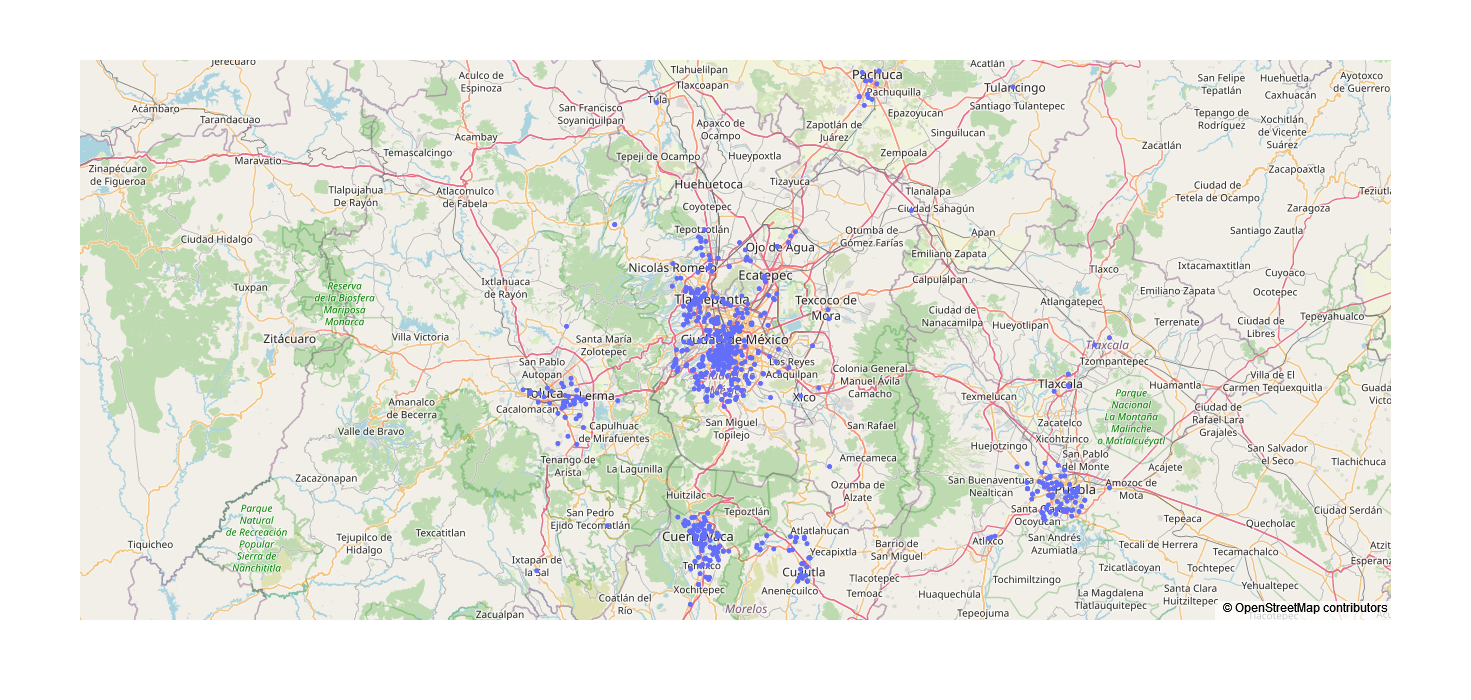

In [67]:
# Using plotly express to create figure
fig = px.scatter_mapbox(
    df,  
    lat="lat",
    lon="lon",
    center={"lat": 19.43, "lon": -99.13},  
    width=1000,   
    height=700,  
    hover_data=["price_usd", "state"],   
)

 
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

The map above are the houses in the dataset distributed evenly throughout mexico

## Lets get the 10 most prevalent states in our dataset.

In [68]:
df["state"].nunique()

30

In [69]:
df["state"].unique()

array(['Estado de México', 'Nuevo León', 'Guerrero', 'Yucatán',
       'Querétaro', 'Morelos', 'Chiapas', 'Tabasco', 'Distrito Federal',
       'Nayarit', 'Puebla', 'Veracruz de Ignacio de la Llave', 'Sinaloa',
       'Tamaulipas', 'Jalisco', 'San Luis Potosí', 'Baja California',
       'Hidalgo', 'Quintana Roo', 'Sonora', 'Chihuahua',
       'Baja California Sur', 'Zacatecas', 'Aguascalientes', 'Guanajuato',
       'Durango', 'Tlaxcala', 'Colima', 'Oaxaca', 'Campeche'],
      dtype=object)

In [70]:
df["state"].value_counts()

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Chiapas                             55
Guerrero                            49
Tamaulipas                          48
Quintana Roo                        38
Baja California                     29
Sinaloa                             26
Chihuahua                           20
Tabasco                             20
Hidalgo                             17
Baja California Sur                 15
Sonora                              12
Guanajuato                          12
Aguascalientes                      10
Nayarit                              9
Durango                              7
Tlaxcala           

In [71]:
df["state"].value_counts().head(10)

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: count, dtype: int64

In [72]:
# Let's get the mean, standard deviation, and quartiles for the "area_m2" and "price_usd"

In [73]:
df[["area_m2", "price_usd"]].describe().round()

,area_m2,price_usd
count,1736.0,1736.0
mean,170.0,115332.0
std,81.0,65426.0
min,60.0,33158.0
25%,102.0,65789.0
50%,156.0,99262.0
75%,220.0,150847.0
max,385.0,326734.0


## Now lets Visualize  "area_m2" using histogram

In [74]:
# Create a function for Histogram 

def plot_histogram(data, ylabel, xlabel, title):
    plt.figure(figsize = (10, 6))
    plt.hist(data, edgecolor="white")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title);

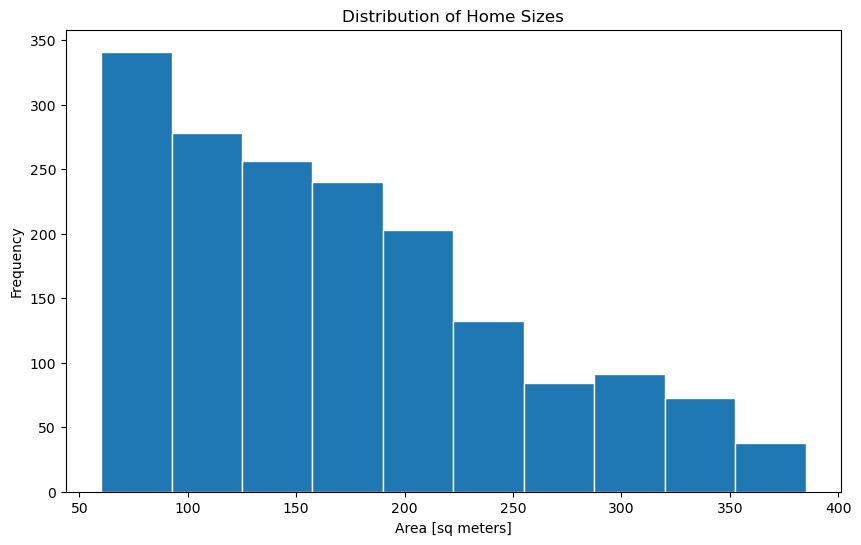

In [75]:
plot_histogram(df['area_m2'], 'Frequency', 'Area [sq meters]', "Distribution of Home Sizes")

Looking at our histogram, we can see that "area_m2" skews right. In other words, there are more houses at the lower end of the distribution (50–200m2) than at the higher end (250–400m2). That explains the difference between the mean and the median.


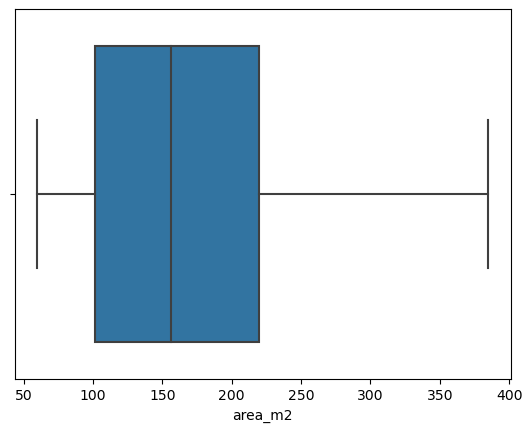

In [76]:
sns.boxplot(data=df, x=df["area_m2"]);

There are more data between (50-200m2) than at the higher end (250-400m2)

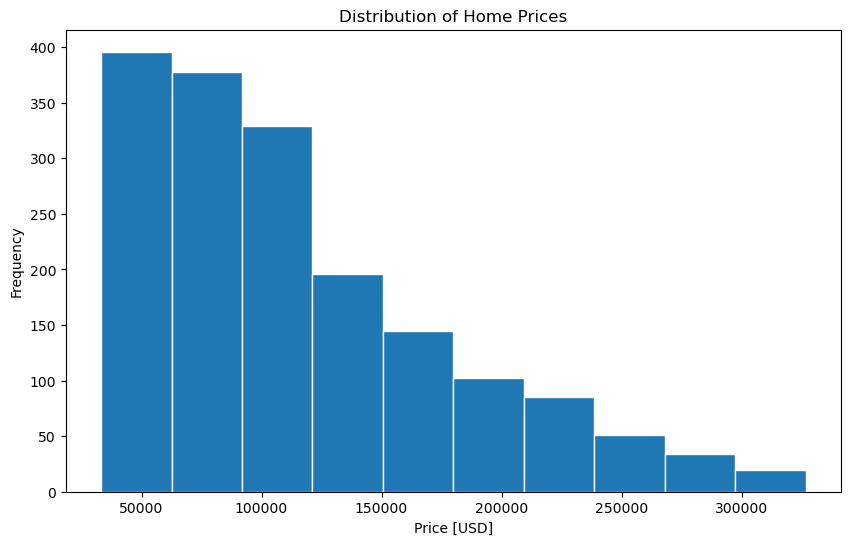

In [77]:
plot_histogram(df['price_usd'], 'Frequency', 'Price [USD]', "Distribution of Home Prices")

"price_usd" is  more skewed than "area_m2" 

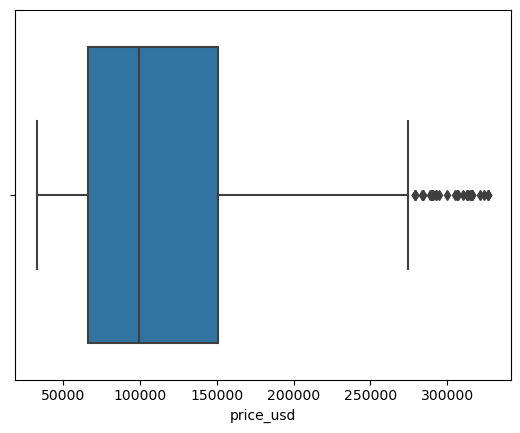

In [78]:
sns.boxplot(data=df, x=df["price_usd"]);

The boxplot also give the same insight. 

In [79]:
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)

print("mean_price_by_state type:", type(mean_price_by_state))
print("mean_price_by_state shape:", mean_price_by_state.shape)
mean_price_by_state.head(30)

mean_price_by_state type: <class 'pandas.core.series.Series'>
mean_price_by_state shape: (30,)


state
Querétaro                          133955.913281
Guanajuato                         133277.965833
Nuevo León                         129221.985663
Distrito Federal                   128347.267426
Quintana Roo                       128065.416053
Chihuahua                          127073.852000
Jalisco                            123386.472167
Estado de México                   122723.490503
Campeche                           121734.633333
Puebla                             121732.974000
Guerrero                           119854.276122
Sonora                             114547.883333
Morelos                            112697.295625
Aguascalientes                     110543.888000
Baja California Sur                109069.339333
Yucatán                            108580.388596
Chiapas                            104342.313273
Veracruz de Ignacio de la Llave     96928.125128
Hidalgo                             94012.326471
Sinaloa                             93922.152308
Tamaulipas    

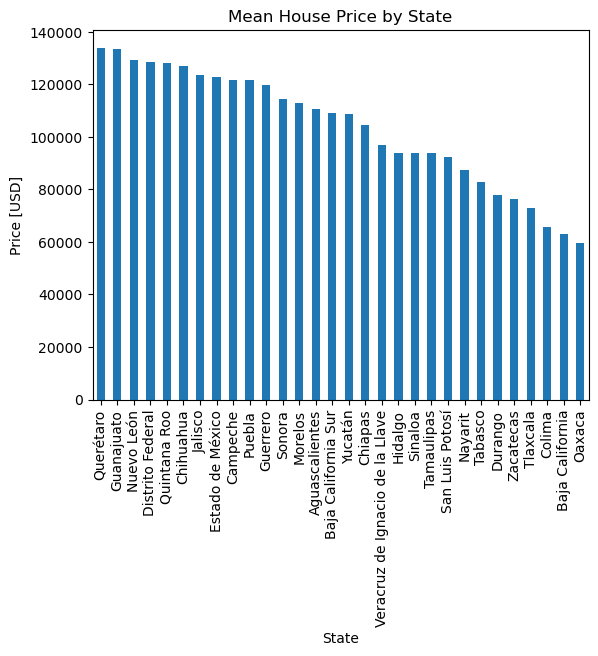

In [80]:
mean_price_by_state.plot(
    kind="bar",
    xlabel="State",
    ylabel="Price [USD]",
    title="Mean House Price by State"
);

It seems odd that Querétaro would be the most expensive real estate market in Mexico when, according to recent GDP numbers, it's not in the top 10 state economies. With all the variations in house sizes across states, a better metric to look at would be price per m2. In order to do that, we need to create a new column.


In [81]:
# Create "price_per_m2" column
df["price_per_m2"] = df["price_usd"] / df["area_m2"]

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
5,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


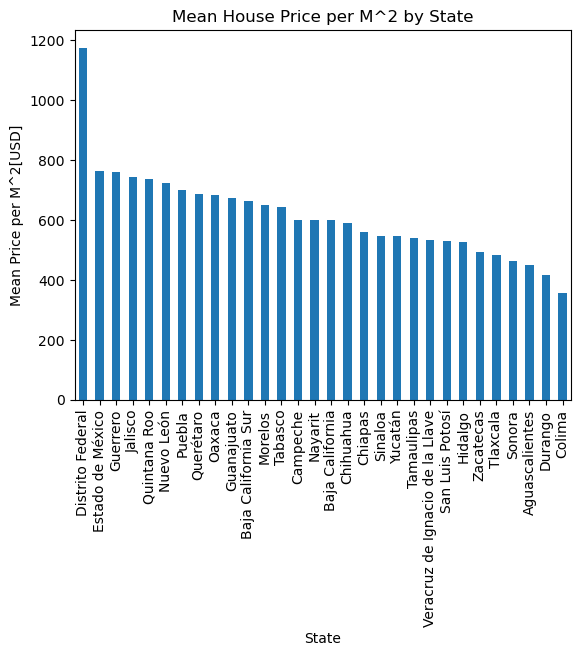

In [82]:
df["price_per_m2"] = df["price_usd"] / df["area_m2"]
 
    
(
    df.groupby("state")
    ["price_per_m2"].mean()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        xlabel="State",
        ylabel="Mean Price per M^2[USD]",
        title="Mean House Price per M^2 by State"
    )
);

Now we see that the capital Mexico City (*Distrito Federal*) is by far the most expensive market

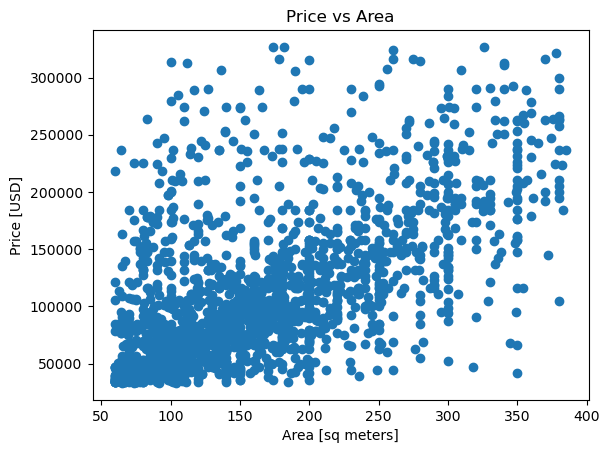

In [83]:
# Creating scatter plot of "price_usd" vs "area_m2"
plt.scatter(x=df["area_m2"], y=df["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price vs Area");

While there's a good amount of variation, there's definitely a positive correlation — in other words, the bigger the house, the higher the price. But how can we quantify this correlation? 

In [94]:
p_correlation = df["area_m2"].corr(df["price_usd"]).round(2)

In [89]:
df_morelos = df[df["state"] == "Morelos"]

df_morelos.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
9,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
12,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188
21,house,Morelos,18.855343,-99.241142,73,36775.16,503.769315
60,house,Morelos,18.804197,-98.932816,130,65858.10,506.600769
66,house,Morelos,18.960244,-99.212962,305,227351.46,745.414623


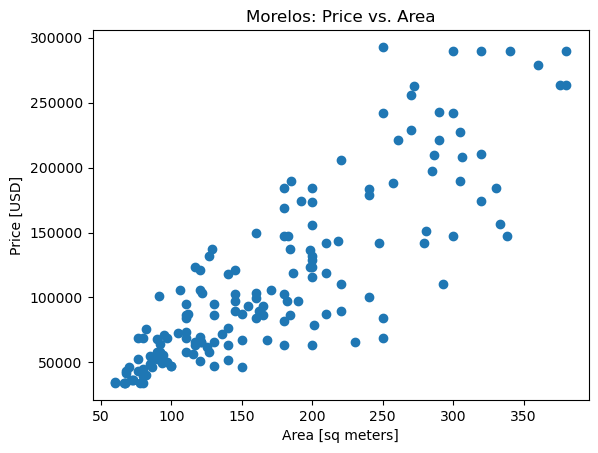

In [90]:
plt.scatter(x=df_morelos["area_m2"], y=df_morelos["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Morelos: Price vs. Area");

correlation between price and Area sq-meters is stronger within Morelos. Let's calculate the correlation coefficient and verify that that's the case.

In [95]:
p_correlation = df_morelos["area_m2"].corr(df_morelos["price_usd"])
print("Correlation of 'area_m2' and 'price_usd' (Morelos):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (Morelos): 0.8498077608713708


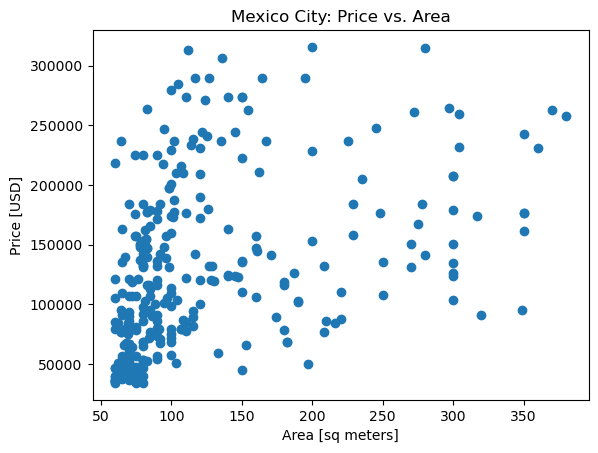

In [93]:
df_mexico_city = df[df["state"] == "Distrito Federal"]

plt.scatter(df_mexico_city["area_m2"], df_mexico_city["price_usd"]) 
plt.xlabel("Area [sq meters]") 
plt.ylabel("Price [USD]")  

plt.title("Mexico City: Price vs. Area") 
p_correlation = df_mexico_city["area_m2"].corr(df_morelos["price_usd"])


There is a weak relationship between size and price.  

Upon thorough analysis of the data, it can be inferred that while a correlation between size and price is observable in numerous states, this relationship does not maintain its consistency within the nation's largest and most economically influential urban center. This variance suggests the presence of additional influential factors on price within this particular context.